<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Statistical_Moments_Skewness_and_Kurtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf

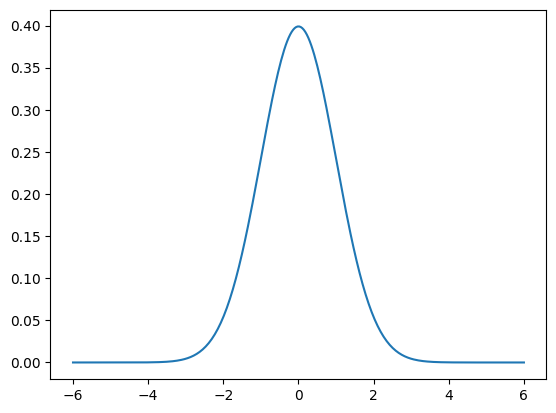

In [2]:
xs = np.linspace(-6, 6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal)
plt.show()

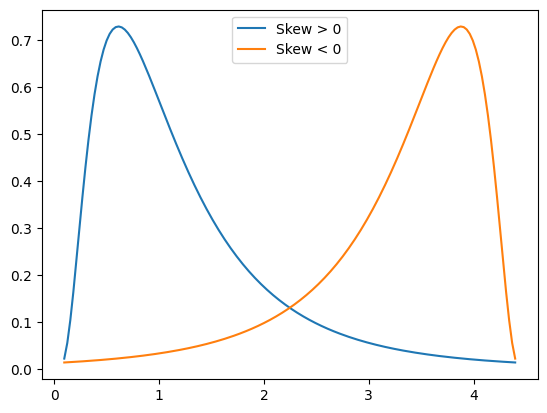

In [3]:
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-0.1), stats.lognorm.ppf(0.99, 0.7, loc=-0.7), 150)
lognormal = stats.lognorm.pdf(xs2, 0.7)
plt.plot(xs2, lognormal, label='Skew > 0')
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


Skew: -0.2001282729022691
Mean: 0.0006616233995904123
Median: 0.0007118475507648103


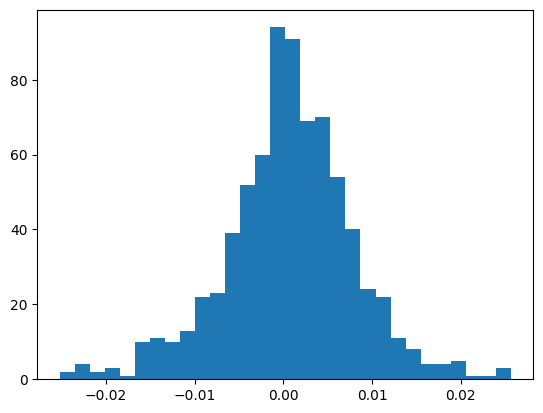

In [4]:
start = '2012-01-01'
end = '2015-01-01'
pricing = yf.download('SPY', start=start, end=end)
returns = pricing['Close'].pct_change()[1:]

print(f'Skew: {stats.skew(returns)}')
print(f'Mean: {np.mean(returns)}')
print(f'Median: {np.median(returns)}')

plt.hist(returns, 30)
plt.show()

### Kurtosis

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


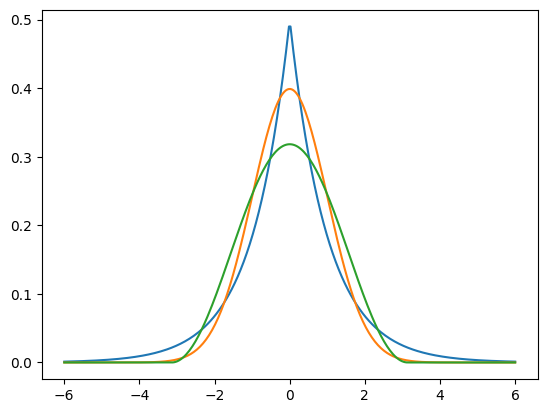

In [5]:
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print(f'Excess kurtosis of leptokurtic distribution: {stats.laplace.stats(moments="k")}')

plt.plot(xs, normal, label='Mesokurtic (normal)')
print(f'Excess kurtosis of mesokurtic distribution: {stats.norm.stats(moments="k")}')

plt.plot(xs, stats.cosine.pdf(xs), label='Platykurtic')
print(f'Excess kurtosis of platykurtic distribution: {stats.cosine.stats(moments="k")}')

In [6]:
print(f'Excess kurtosis of returns: {stats.kurtosis(returns)}')

Excess kurtosis of returns: 1.1574301106641744


### Normality Testing Using Jarque-Bera

In [7]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000
pvalues = np.zeros(shape=(N,))

for i in range(N):
    X = np.random.normal(0, 1, M)
    output = jarque_bera(X)
    pvalues[i] = output[1]

num_significant = len(pvalues[pvalues < 0.05])
print(float(num_significant / N))

0.052


In [8]:
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print(f'The returns are likely normal')
else:
    print('The returns are likely not normal')

The returns are likely not normal


## Questions

In [9]:
# 1. testing for skew
xs2 = np.linspace(stats.gamma.ppf(0.01, 0.7, loc=-1), stats.gamma.ppf(0.99, 0.7, loc=-1), 150) + 1
X = stats.gamma.pdf(xs2, 1.5)

print(stats.skew(X))

0.26474831096388496


In [19]:
start = '2015-01-01'
end = '2016-01-01'

pricing = yf.download('NFLX', start=start, end=end)
returns = pricing['Close'].pct_change()[1:]

print(f'\n{stats.skew(returns)}')

[*********************100%%**********************]  1 of 1 completed


1.8460554584124012


In [11]:
# 2. Testing for Kurtosis
xs = np.linspace(-6,6, 300) + 2
Y = stats.cosine.pdf(xs)

print(f'Kurtosis of Y: {stats.kurtosis(Y)}')

Kurtosis of Y: -0.6344720164161468


In [12]:
print(f'Kurtosis of Netflix returns: {stats.kurtosis(returns)}')

Kurtosis of Netflix returns: 9.608733458788484


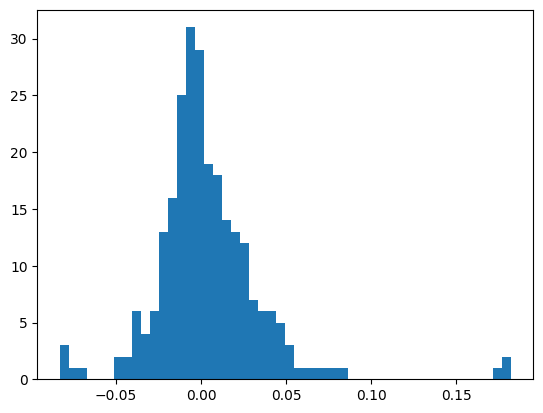

In [13]:
plt.hist(returns, bins=50)
plt.show()

In [14]:
# 3. Skew and normality
xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

print(f'Skew for Z: {stats.skew(Z)}')

Skew for Z: 1.1121491036049673


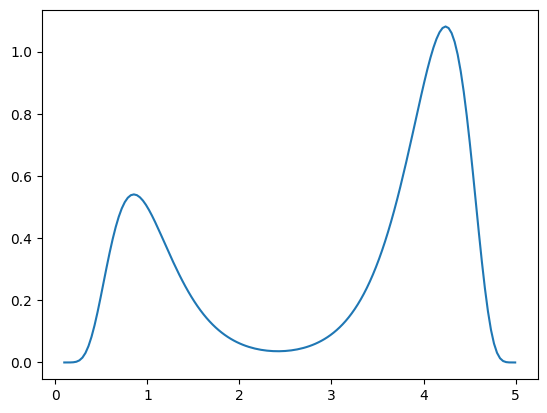

In [15]:
plt.plot(xs2, Z)
plt.show()

In [17]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

num_significant = len(pvalues[pvalues < 0.05])
print(f'Number of significant values: {num_significant / N}')

Number of significant values: 0.059


In [18]:
_, pvalue, _, _ = jarque_bera(Z)
if pvalue > 0.05:
    print(f'The returns are likely normal')
else:
    print('The returns are likely not normal')

The returns are likely not normal


[*********************100%%**********************]  1 of 1 completed


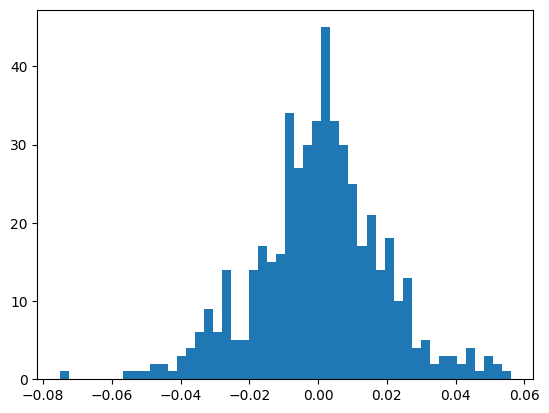

In [28]:
# 4. Out of Sample Test
start = '2014-01-01'
end = '2016-01-01'

pricing = yf.download('AMC', start=start, end=end)
returns = pricing['Close'].pct_change()[1:]

plt.hist(returns, bins=50)
plt.show()

In [29]:
print(f'Skew of AMC returns (all): {stats.skew(returns)}')

start = '2016-01-01'
end = '2016-06-30'

pricing = yf.download('AMC', start=start, end=end)
returns = pricing['Close'].pct_change()[1:]
print(f'\nSkew of AMC returns (first half of 2016): {stats.skew(returns)}')

[*********************100%%**********************]  1 of 1 completed

Skew of AMC returns (all): -0.14167298486970067

Skew of AMC returns (first half of 2016): 1.0333546383431162


In [31]:
AMC = yf.download('AMC', start='2015-01-01', end='2017-01-01')
rolling_skew = AMC['Close'].rolling(window=60, center=False).skew()

[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, '60-day Rolling Skew')

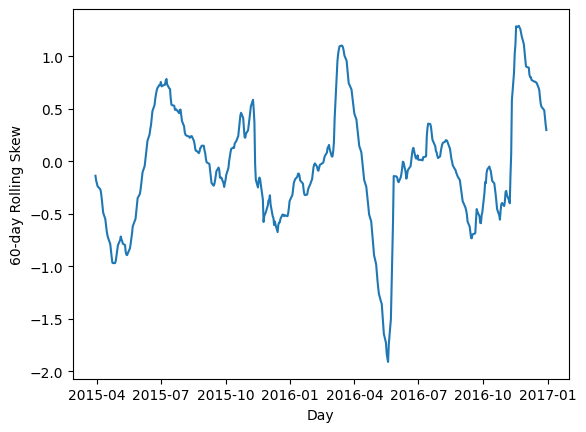

In [32]:
plt.plot(rolling_skew)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Skew')